# **Recognize** **Handwritten** **text** **to** **Digits** 

---



---



---



This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. More info can be found at the MNIST homepage.


In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
print(f"X_train : {len(x_train)}, \nX_test : {len(x_test)} \nY_train : {len(y_train)} \nY_test : {len(y_test)}")

X_train : 60000, 
X_test : 10000 
Y_train : 60000 
Y_test : 10000


In [4]:
x_train[0].shape

(28, 28)

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

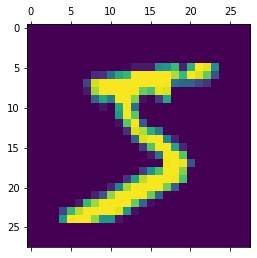

In [6]:
plt.matshow(x_train[0]) #first plot of matrix 

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
#flatten the matrix so that we can use it as input in nural network

x_train_flattened = x_train.reshape(len(x_train),28*28)
x_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
x_train_flattened.shape

(60000, 784)

In [11]:
#similarly flattened x_test
x_test.shape

(10000, 28, 28)

In [12]:
x_test_flattened = x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

**Very simple neural network with no hidden layers**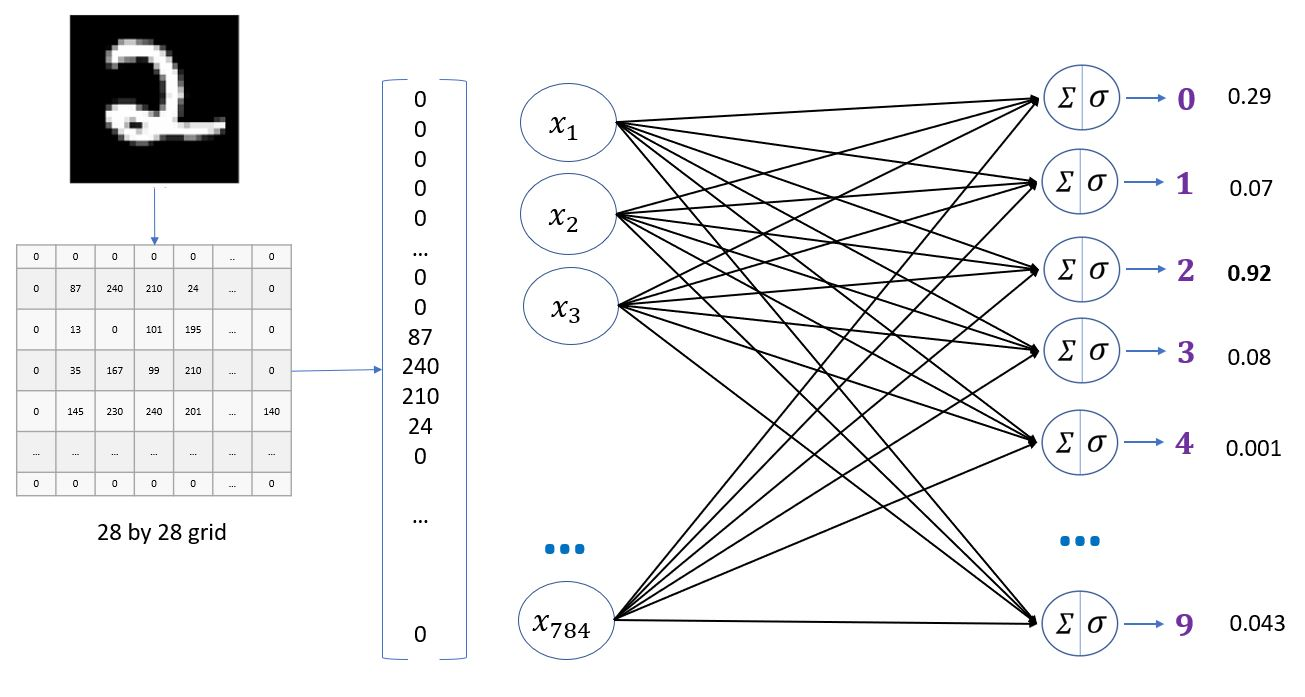




In [13]:
#create model

model=tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = (784,), activation="sigmoid")
])

In [14]:
#compile the model

model.compile(
    optimizer="adam",
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
#fit the model
#model.fit(x_train_flattened,y_train, epochs=5)
#accuracy=.9266 loss: 0.2666

Epoch 1/5
1875/1875 [==============================] - 13s 4ms/step - loss: 0.4688 - accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3037 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2834 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2725 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2667 - accuracy: 0.9255


In [18]:
#with epochs=10
model.fit(x_train_flattened,y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2619 - accuracy: 0.9270
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2586 - accuracy: 0.9281
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2553 - accuracy: 0.9289
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2529 - accuracy: 0.9300
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2507 - accuracy: 0.9307
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2498 - accuracy: 0.9309
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2474 - accuracy: 0.9319
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2463 - accuracy: 0.9316
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2450 - accuracy: 0.9321
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.244

In [19]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2693 - accuracy: 0.9252


[0.2692570686340332, 0.9251999855041504]

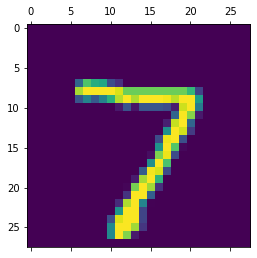

In [21]:
plt.matshow(x_test[0])

In [22]:
y_predicted=model.predict(x_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [31]:
y_predicted

array([[1.2051747e-03, 1.2052612e-09, 4.8039998e-03, ..., 9.9987066e-01,
        6.2802173e-02, 6.6500896e-01],
       [4.1770777e-01, 2.5391779e-03, 9.9986899e-01, ..., 2.4292898e-17,
        4.7950808e-02, 5.2512834e-14],
       [1.0001640e-04, 9.9392623e-01, 6.5991873e-01, ..., 1.7483328e-02,
        2.5583878e-01, 2.6775928e-02],
       ...,
       [9.4621208e-07, 1.1582639e-07, 5.3874741e-04, ..., 1.8469109e-01,
        4.8457518e-01, 7.3059523e-01],
       [5.8046817e-06, 4.9625314e-06, 4.4077997e-06, ..., 7.9268348e-06,
        5.0161761e-01, 5.3792487e-06],
       [1.2291587e-03, 4.5545477e-12, 1.6610838e-01, ..., 6.3275828e-13,
        9.7954035e-06, 3.2920622e-09]], dtype=float32)

In [24]:
np.argmax(y_predicted[0])

7

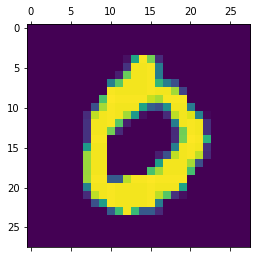

In [25]:
plt.matshow(x_test[3])

In [26]:
np.argmax(y_predicted[3])

0

In [33]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [35]:
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    5,    3,    2,    1,    0],
       [   0, 1112,    4,    3,    0,    1,    3,    2,   10,    0],
       [   7,    8,  940,   16,    7,    3,   11,    9,   26,    5],
       [   5,    0,   20,  923,    1,   28,    2,   10,   14,    7],
       [   1,    1,    8,    2,  910,    0,   13,    4,    9,   34],
       [  11,    2,    2,   31,    7,  789,   13,    7,   26,    4],
       [  12,    3,   11,    1,    7,   14,  908,    1,    1,    0],
       [   2,    6,   24,    7,    4,    1,    0,  949,    1,   34],
       [  12,   10,    7,   30,    9,   37,   10,   11,  837,   11],
       [  11,    7,    1,    9,   26,    7,    0,   25,    5,  918]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

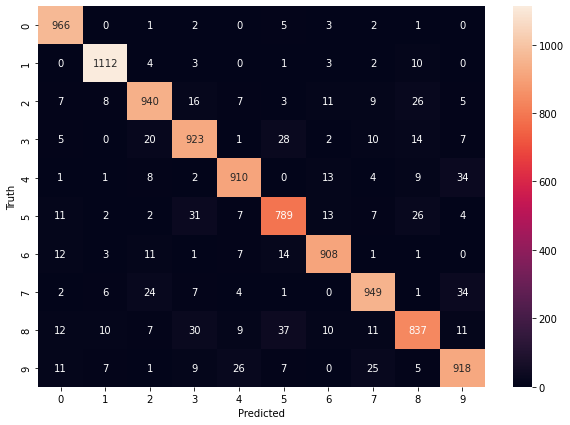

In [36]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [39]:
#now add hidden layers in this model

#create model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape = (784,), activation="relu"),
    tf.keras.layers.Dense(10, activation="sigmoid")
])

#compile the model
model.compile(
    optimizer="adam",
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#fit the model
model.fit(x_train_flattened,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2738 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1230 - accuracy: 0.9645
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0861 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0647 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0515 - accuracy: 0.9844


In [40]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0809 - accuracy: 0.9747


[0.08088705688714981, 0.9746999740600586]

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

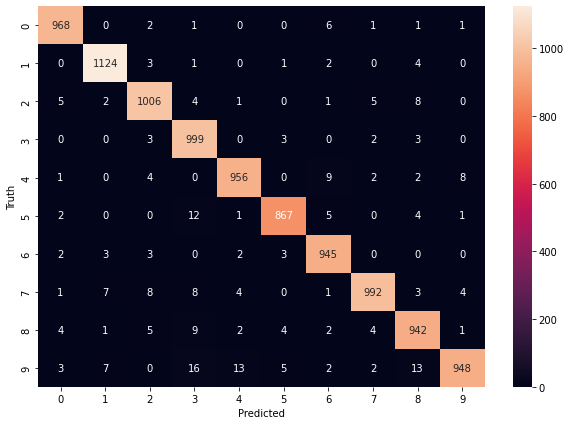

In [42]:
y_predicted=model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Notice that errors are reduced

In [47]:
#now flattened by keras function instead of numpy flattened in this model

#create model
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, input_shape = (784,), activation="relu"),
    tf.keras.layers.Dense(10, activation="sigmoid")
])

#compile the model
model.compile(
    optimizer="adam",
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#fit the model
model.fit(x_train,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2660 - accuracy: 0.9248
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1190 - accuracy: 0.9646
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0831 - accuracy: 0.9757
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0638 - accuracy: 0.9811
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0493 - accuracy: 0.9852


In [49]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0785 - accuracy: 0.9755


[0.07850265502929688, 0.9754999876022339]

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

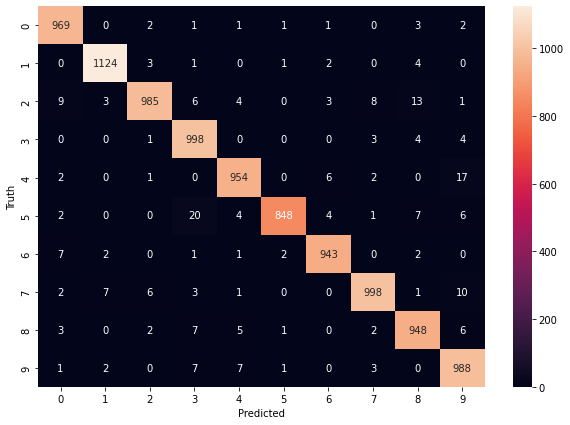

In [50]:
y_predicted=model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

ACCURACY : 97.54999876022339 %

THANK YOU FOR GOING THROUGH THIS.....